In [131]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

In [132]:
im=cv2.imread('C:/Users/user/Desktop/Doraemon.jpg',0)

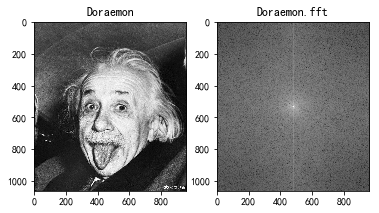

In [133]:
im_F=np.fft.fft2(im)
im_f=np.fft.fftshift(im_F)
im_fft=np.log(1+np.abs(im_f))

plt.subplot(121),plt.imshow(im,'gray'),plt.title('Doraemon')
plt.subplot(122),plt.imshow(im_fft,'gray'),plt.title('Doraemon.fft')
plt.show()

In [137]:
def FX_combine(im_fd,im_xw):
 # 幅度谱和相位谱结合   
 img=im_fd*np.exp(1j*im_xw)
 # 图像重构
 img=np.abs(np.fft.ifft2(img))
 img=img/np.max(img)*255
 return img

In [138]:
Fd=np.abs(im_f)
Doraemon_Fd=np.log(Fd)
Xw=np.angle(im_f)
Doraemon_Xw=np.log(Xw)

D:\Python\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


In [139]:
# 幅度谱和相位谱都不变
Doraemon1=FX_combine(Fd,Xw)
#幅度谱不变，相位谱为0
w,h=im.shape
Xw0=np.zeros((w,h))
Doraemon2=FX_combine(Fd,Xw0)
# 幅度谱为1，相位谱不变
Fd1=np.ones((w,h))
Doraemon3=FX_combine(Fd1,Xw)
Doraemon3=3*Doraemon3

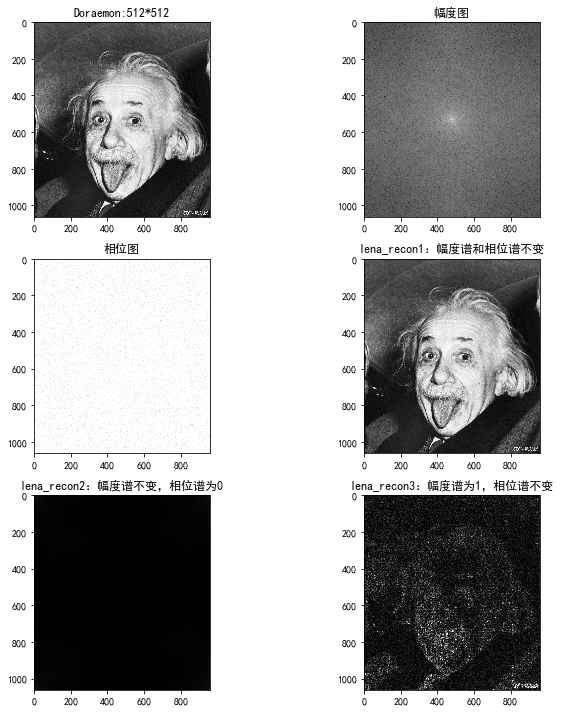

In [140]:
plt.figure(figsize=(10, 10))
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.subplot(321), plt.imshow(im, 'gray'),plt.title('Doraemon:512*512')
plt.subplot(322), plt.imshow(Doraemon_Fd, 'gray'),plt.title('幅度图')
plt.subplot(323), plt.imshow(Doraemon_Xw, 'gray'),plt.title('相位图')
plt.subplot(324), plt.imshow(Doraemon1, 'gray',vmin=0, vmax=255),plt.title('lena_recon1：幅度谱和相位谱不变')
plt.subplot(325), plt.imshow(Doraemon2, 'gray',vmin=0, vmax=255),plt.title('lena_recon2：幅度谱不变，相位谱为0')
plt.subplot(326), plt.imshow(Doraemon3, 'gray',vmin=0, vmax=255),plt.title('lena_recon3：幅度谱为1，相位谱不变')
plt.tight_layout()